In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import glob
from PIL import Image
import numpy as np
import pandas as pd

def load_img(imfile):
    img = Image.open(imfile)
    img.load()
    return np.asarray(img, dtype="int32")

#read files
host_dir = "kaggle/cell_images/"
uninfected = glob.glob(host_dir + "Uninfected/*.png")
parasitized = glob.glob(host_dir + "Parasitized/*.png")

#load images into np arrays
uDat = np.load(host_dir + "uninfected_vectorized_rgbList.npy")
pDat = np.load(host_dir + "parasitized_vectorized_rgbList.npy")

Using TensorFlow backend.


In [3]:
#extend previous code to get the colors in each image
pNColors = np.zeros(len(uninfected))
uNColors = np.zeros(len(parasitized))

i = load_img(parasitized[0])
ishp = i.shape
p_df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3)).drop_duplicates()
i = load_img(uninfected[0])
ishp = i.shape
u_df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3)).drop_duplicates()

pdfs = []
udfs = []
for dex, im in enumerate(parasitized):
    i = load_img(im)
    ishp = i.shape
    df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3)).drop_duplicates()
    #p_df = pd.concat([p_df, df])
    pdfs.append(df)
    pNColors[dex] = len(df.index)#gets # of colors in image
#pColors = p_df.drop_duplicates().to_numpy()

for dex, im in enumerate(uninfected):
    i = load_img(im)
    ishp = i.shape
    df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3)).drop_duplicates()
    #u_df = pd.concat([u_df, df])
    udfs.append(df)
    uNColors[dex] = len(df.index)#gets # of colors in image
#uColors = u_df.drop_duplicate().to_numpy()

In [4]:
u_df = np.concatenate(([el.drop_duplicates().to_numpy() for el in udfs]))
p_df = np.concatenate(([el.drop_duplicates().to_numpy() for el in pdfs]))

In [5]:
u_df.shape

(9860877, 3)

In [6]:
p_df.shape

(21025570, 3)

In [10]:
allColors = np.concatenate(([u_df,p_df]))
print(allColors.shape)
allColors = pd.DataFrame(allColors).drop_duplicates().to_numpy()
print(allColors.shape)
allColors = np.unique(allColors, axis=1)
print(allColors.shape)

(30886447, 3)
(366057, 3)
(366057, 3)


In [3]:
#define a simple model
#ok..maybe not so simple
#one way I don't have to repixelate the images is to use features which
#are the fraction of pixels in the image which are a given color
#the input layer can be all of the possible colors which are found in
#all of the images
model1 = Sequential()

In [11]:
np.save(host_dir + "images_allColors.npy", allColors)

In [3]:
allColors = np.load(host_dir + "images_allColors.npy")

In [4]:
allColors

array([[  0,   0,   0],
       [157, 173, 220],
       [158, 174, 221],
       ...,
       [123,   6, 169],
       [110,   0, 160],
       [115,   0, 163]], dtype=int32)

In [5]:
#let's try and cluster the colors
from sklearn.cluster import KMeans, DBSCAN, MeanShift

In [46]:
fit = DBSCAN(eps=1.5, min_samples = 5).fit(allColors)

In [22]:
import find_clusters_lib

In [26]:
#np.savetxt(host_dir + "images_allColors.txt", allColors, delimiter=" ")
#find_clusters_lib.run(host_dir + "images_allColors.txt", graph_name = 
#                      "colorClusters.png", labels_name = "colorClusters.dat",
#                     print_verbose = True, hpc_name = "colors_hpc.dat")

In [54]:
#fit = MeanShift(bandwidth=10000000).fit(allColors)

In [6]:
fit = KMeans(n_clusters = 10).fit(allColors)

In [7]:
pd.Index(fit.labels_).value_counts()

3    44286
0    44070
9    36387
4    36329
6    35424
8    35114
5    34320
2    33923
1    33918
7    32286
dtype: int64

In [8]:
fit.cluster_centers_

array([[138.97469647, 105.91412686, 187.87557018],
       [109.37396122,  75.2708493 , 153.29539695],
       [134.05252138,  35.20510174, 166.39365969],
       [178.22746674, 147.23767474, 161.7615574 ],
       [188.82852264, 190.00586648, 209.52726672],
       [ 91.75032786,  22.73045202, 124.26450616],
       [150.56483337, 107.44710331, 122.30174676],
       [171.88394985,  78.5591085 , 154.77542176],
       [159.522045  , 148.03383651, 210.33494731],
       [147.89919222,  42.89034509, 109.24623585]])

In [12]:
from colr import color
s = """          """#dummy block
for c in fit.cluster_centers_:
    print(color(s, back=(c[0], c[1], c[2])))

In [11]:
fit.cluster_centers_[0]

array([138.97469647, 105.91412686, 187.87557018])

In [13]:
fit20 = KMeans(n_clusters = 20).fit(allColors)

In [30]:
#takes a np array and prints the colors
def printColors(fit):
    from colr import color
    s = """          """#dummy block
    string = ""
    for i, c in enumerate(fit):
        string += color(s, back=(c[0], c[1], c[2]))
        #print(color(s, back=(c[0], c[1], c[2])))
        if (i+1)%5==0:
            string += "\n"
    print(string)
def printColor(c):
    s = """          """#dummy block
    print(color(s, back=(c[0], c[1], c[2])))

In [31]:
print(pd.Index(fit20.labels_).value_counts())
printColors(fit20.cluster_centers_)

13    22139
1     21435
6     20305
10    20101
2     20036
14    19791
11    19546
5     19002
12    18809
8     18517
0     18404
3     18339
19    18192
17    18162
7     18152
15    17220
9     17082
18    16483
4     14894
16     9448
dtype: int64
                                                  
                                                  
                                                  
                                                  



In [29]:
printColor(fit20.cluster_centers_[1])

/home/brandon/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


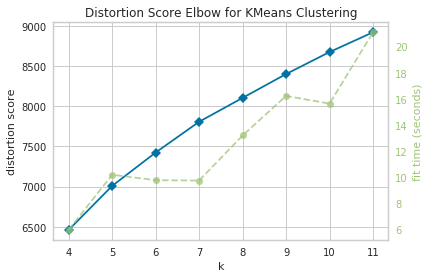

In [33]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(allColors)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


In [35]:
# Instantiate the clustering model and visualizer
#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(2,50))#
#
#visualizer.fit(allColors)    # Fit the data to the visualizer
#visualizer.poof()    # Draw/show/poof the data


20
25
30
35
40
45
50


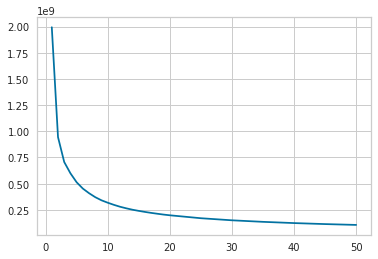

In [238]:
#import matplotlib.pyplot as plot
moreks=[20,25,30,35,40,45,50]
for k in moreks:
    print(k)
    ks.append(k)
    f = KMeans(n_clusters = k).fit(allColors)
    fits.append(f)
    ss.append(f.inertia_)
plt.plot(ks,ss)
plt.show()

In [224]:
import matplotlib.pyplot as plt
ks = []
ss = []
fits = []

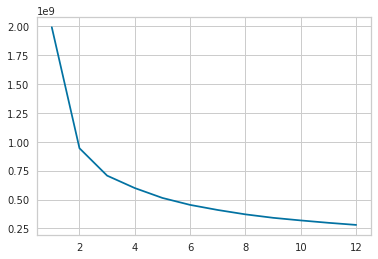

In [236]:
k = 12
ks.append(k)
f = KMeans(n_clusters = k).fit(allColors)
fits.append(f)
ss.append(f.inertia_)
plt.plot(ks,ss)
plt.show()

13
14
15
16
17
18
19


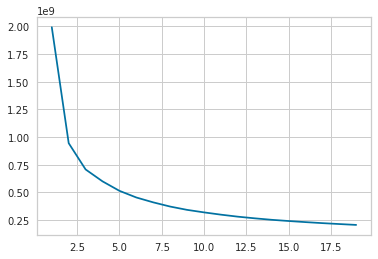

In [237]:
for k in range(13, 20):
    ks.append(k)
    print(k)
    f = KMeans(n_clusters = k).fit(allColors)
    fits.append(f)
    ss.append(f.inertia_)
plt.plot(ks,ss)
plt.show()

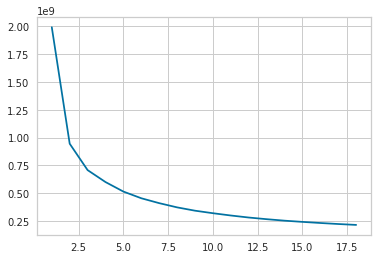

In [61]:
plt.plot(ks,ss)
plt.show()

In [239]:
ks

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 25,
 30,
 35,
 40,
 45,
 50]

In [83]:
#Ok, so my simple models will be based on the clusters of colors detected
#Features will be fraction of pixels which are each color in each image
#Then I will try a few separate models:
#Logistic Regression (simple binary classification) I will vary the number of colors included by the total number of pixels
#in all of the images which are that clustered color
#
#Decision Tree/Random Forest/Boosing (simple binary classification)
#
#A Neural Network which takes as input the fraction of each clustered color. Maybe a few different architectures.
#
#Also try autosklearn on this model
#
#And autokeras if I can
#
#Then do the fancier model
#
#The LIME interpretation for image classification seems really nice and I would like to try and use that.
#
#Should try skopt to optimize hyperparameters
#
#I think I would like to try using computer vision to draw an outline around the part of the image which is the parasite

In [84]:
#I should probably try a few different clustering of the colors since it isn't compeltely clear how many colors I should
#choose

In [248]:
for fit in fits:
    np.savetxt(host_dir + str(len(fit.cluster_centers_)) + "colorClusters.txt",fit.cluster_centers_)

In [249]:
for fit in fits:
    np.savetxt(host_dir + str(len(fit.cluster_centers_)) + "colorClusterLabels.txt",fit.labels_)

In [93]:
#So, the first step is to create a DataFrame where I have extracted my features

In [291]:
def dex_np_arr(arr, refArr):
    #let's just do 2d arrays for now....
    #and let's just do it exactly like I need
    for i, el in enumerate(arr):
        if np.array_equal(el,refArr):
            return i
    return -1

def load_img(imfile):
    img = Image.open(imfile)
    img.load()
    return np.asarray(img, dtype="int32")

def dex_color(R,G,B,cR,cG,cB):
    print("args=" + str(R) + "," + str(G) + "," + str(B))
    indices = np.where(cR==R)#gets just locatins of the red
    sublistColors = np.take(cG, indices)
    indices = np.take(indices, np.where(sublistColors[0]==G))#matches now both red and green
    sublistColors = np.take(cB, indices)
    dex = np.take(indices, np.where(sublistColors[0]==B))[0][0]#matches all 3 colors
    return dex

def colorFrac(image, colors, cR, cG, cB, cL):
    
    #first label the colors according to 
    
    #fractions of each color
    fracs = np.zeros(len(colors))
    print(image.shape)
    
    for i in range(0, len(image)):
        for j in range(0, len(image[0])):
    #        #color of this pixel
            R = image[i][j][0]
            G = image[i][j][1]
            B = image[i][j][2]
            
            print("i,j=" + str(i) + "," + str(j) + ", color=" + str(R) + "," + str(G) + "," + str(B))
            
            #indices = np.where(cR==R)#gets just locatins of the red
            #sublistColors = np.take(cG, indices)
            #indices = np.take(indices, np.where(sublistColors[0]==G))#matches now both red and green
            #sublistColors = np.take(cB, indices)
            #dex = np.take(indices, np.where(sublistColors[0]==B))[0][0]#matches all 3 colors
            
            #for some reason it's not working here, so I made a function which also does the job
            dex = dex_color(R,G,B,cR,cG,cB)
            
            label = int(cL[dex])
            fracs[label] += 1
            
    #        
    #        #label of this color
    #        dex = dex_np_arr(colors==labels[:, :3], color)#finds the index associated with this color
    #        label = int(labels[dex, 3])
    #        color_CG = labels[dex,:3]
    #       fracs[label] += 1 #adds to the count for this image
    
    #np.where(array1==0, 1, array1)
    
            
    fracs/=(len(image)*len(image[0]))
    return fracs


#reads data into a dataframe for k clusters
def getData_colorClusters(k):
    
    #read image files
    host_dir = "kaggle/cell_images/"
    uninfected = glob.glob(host_dir + "Uninfected/*.png")
    parasitized = glob.glob(host_dir + "Parasitized/*.png")
    
    #read cluster info
    cluster_centers_ = np.loadtxt(host_dir + str(k) + "colorClusters.txt")#the color associated with this cluster
    color_labels = np.loadtxt(host_dir + str(k) + "colorClusterLabels.txt")#the labels for each color in this clustering
    color_labels.view('f8,f8,f8,f8').sort(order=['f1'], axis=0) #sorts the colors
    cR = color_labels[:,0]
    cG = color_labels[:,1]
    cB = color_labels[:,2]
    cL = color_labels[:,3]
    
    #convert images to vectors with clustered colors
    data = np.zeros(shape=(len(uninfected)+len(parasitized),k+1))
    c = 0
    
    for dex, im in enumerate(parasitized):
        i = load_img(im)
        data[c] = colorFrac(i, cluster_centers, color_labels)
        c+=1
    for dex, im in enumerate(uninfected):
        i = load_img(im)
        data[c] = colorFrac(i, cluster_centers, color_labels)
        c+=1
    
    return data

In [261]:
host_dir = "kaggle/cell_images/"
uninfected = glob.glob(host_dir + "Uninfected/*.png")
parasitized = glob.glob(host_dir + "Parasitized/*.png")
cluster_centers_ = np.loadtxt(host_dir + str(1) + "colorClusters.txt")#the color associated with this cluster
color_labels = np.loadtxt(host_dir + str(1) + "colorClusterLabels.txt")#the labels for each color in this clu

In [292]:
fracs = colorFrac(load_img(parasitized[0]),cluster_centers_, cR, cG, cL, cB)
print(fracs)
print(fracs.shape)

(148, 142, 3)
i,j=0,0, color=0,0,0
args=0,0,0
i,j=0,1, color=0,0,0
args=0,0,0
i,j=0,2, color=0,0,0
args=0,0,0
i,j=0,3, color=0,0,0
args=0,0,0
i,j=0,4, color=0,0,0
args=0,0,0
i,j=0,5, color=0,0,0
args=0,0,0
i,j=0,6, color=0,0,0
args=0,0,0
i,j=0,7, color=0,0,0
args=0,0,0
i,j=0,8, color=0,0,0
args=0,0,0
i,j=0,9, color=0,0,0
args=0,0,0
i,j=0,10, color=0,0,0
args=0,0,0
i,j=0,11, color=0,0,0
args=0,0,0
i,j=0,12, color=0,0,0
args=0,0,0
i,j=0,13, color=0,0,0
args=0,0,0
i,j=0,14, color=0,0,0
args=0,0,0
i,j=0,15, color=0,0,0
args=0,0,0
i,j=0,16, color=0,0,0
args=0,0,0
i,j=0,17, color=0,0,0
args=0,0,0
i,j=0,18, color=0,0,0
args=0,0,0
i,j=0,19, color=0,0,0
args=0,0,0
i,j=0,20, color=0,0,0
args=0,0,0
i,j=0,21, color=0,0,0
args=0,0,0
i,j=0,22, color=0,0,0
args=0,0,0
i,j=0,23, color=0,0,0
args=0,0,0
i,j=0,24, color=0,0,0
args=0,0,0
i,j=0,25, color=0,0,0
args=0,0,0
i,j=0,26, color=0,0,0
args=0,0,0
i,j=0,27, color=0,0,0
args=0,0,0
i,j=0,28, color=0,0,0
args=0,0,0
i,j=0,29, color=0,0,0
args=0,0,0
i,j=0,

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
#defines a logistic regression model with k clusters of colors
def logisticModel(k):
    from sklearn.linear_model import LogisticRegression
    

In [252]:
df = pd.DataFrame(allColors)

In [254]:
df[['labels']] = pd.DataFrame(fit.labels_)

In [257]:
df.iloc[376]

0         226
1         176
2         167
labels     34
Name: 376, dtype: int32

In [258]:
for fit in fits:
    df = pd.DataFrame(allColors)
    df[['labels']] = pd.DataFrame(fit.labels_)
    np.savetxt(host_dir + str(len(fit.cluster_centers_)) + "colorClusterLabels.txt",df.to_numpy())

In [134]:
color_labels.view('f8,f8,f8,f8').sort(order=['f1'], axis=0)

In [118]:
color_labels

array([[  0.,   0.,   0.,   0.],
       [157., 173., 220.,   0.],
       [158., 174., 221.,   0.],
       ...,
       [123.,   6., 169.,   0.],
       [110.,   0., 160.,   0.],
       [115.,   0., 163.,   0.]])

In [136]:
color_labels

array([[  0.,   0.,   0.,   0.],
       [ 13.,   0., 123.,   0.],
       [ 15.,   0., 108.,   0.],
       ...,
       [211., 238., 235.,   0.],
       [214., 241., 238.,   0.],
       [212., 244., 243.,   0.]])

color_labels = np.loadtxt(host_dir + str(1) + "colorClusterLabels.txt")#the labels for each color in this clu

In [122]:
color_labels.shape

(366057, 4)

In [131]:
type(color_labels[0][0])

numpy.float64

In [269]:
    cR = color_labels[:,0]
    cG = color_labels[:,1]
    cB = color_labels[:,2]
    cL = color_labels[:,3]

In [138]:
cR

array([  0.,  13.,  15., ..., 211., 214., 212.])

In [154]:
np.where(cR==170)

(array([ 17584,  19079,  22198, ..., 361881, 362726, 362727]),)

In [156]:
sublistColors = np.take(cG, indices)

In [145]:
len(indices[0])

3977

In [148]:
len(i2[0])

3977

In [151]:
cG[17584]

13.0

In [152]:
cR[17584]

170.0

In [155]:
indices

(array([ 17584,  19079,  22198, ..., 361881, 362726, 362727]),)

In [157]:
sublistColors

array([[ 13.,  14.,  16., ..., 210., 212., 212.]])

In [159]:
np.where(sublistColors[0]==150)

(array([2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900,
        2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911,
        2912, 2913]),)

In [173]:
indices = np.take(indices, np.where(sublistColors[0]==150))

In [174]:
indices

array([[293989, 293990, 293991, 293992, 293993, 293994, 293995, 293996,
        293997, 293998, 293999, 294000, 294001, 294002, 294003, 294004,
        294005, 294006, 294007, 294008, 294009, 294010, 294011, 294012]])

In [167]:
cG[293989]

150.0

In [172]:
cB[293991]

145.0

In [180]:
np.take(indices, np.where(sublistColors[0]==145))[0][0]

293991

In [176]:
sublistColors = np.take(cB, indices)

In [186]:
i = load_img(parasitized[0])
ishp = i.shape
df = pd.DataFrame(i.reshape(ishp[0]*ishp[1],3)).drop_duplicates()

In [210]:
#df

In [197]:
allColors

array([[ 26,   0, 104],
       [ 13,   0,  12],
       [ 24,   0,  14],
       ...,
       [231, 232, 255],
       [246, 236, 255],
       [242, 227, 255]], dtype=int32)

In [199]:
allColors.view('i4,i4,i4').sort(order=['f1'], axis=0) #sorts the colors

/home/brandon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Changing the shape of an F-contiguous array by descriptor assignment is deprecated. To maintain the Fortran contiguity of a multidimensional Fortran array, use 'a.T.view(...).T' instead
  """Entry point for launching an IPython kernel.


In [198]:
allColors

array([[ 26,   0, 104],
       [ 13,   0,  12],
       [ 24,   0,  14],
       ...,
       [231, 232, 255],
       [246, 236, 255],
       [242, 227, 255]], dtype=int32)

In [201]:
cra = allColors[:,0]
cga = allColors[:,1]
cba = allColors[:,2]

In [205]:
#color=226,176,167   
indices = np.where(cra==226)#gets just locatins of the red
sublistColors = np.take(cga, indices)

In [208]:
indices = np.take(indices, np.where(sublistColors[0]==176))#matches now both red and green
sublistColors = np.take(cba, indices)

In [209]:
indices

array([], shape=(1, 0), dtype=int64)

In [211]:
allColors.shape

(366057, 3)

In [222]:
allColors = np.load(host_dir + "images_allColors.npy")

In [250]:
allColors[376]

array([226, 176, 167], dtype=int32)

In [244]:
fits[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [245]:
fits[0].labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [247]:
fits[0].cluster_centers_

array([[160.77312823,  97.57314298, 147.92538047]])

In [251]:
allColors

array([[  0,   0,   0],
       [220, 173, 157],
       [221, 174, 158],
       ...,
       [169,   6, 123],
       [160,   0, 110],
       [163,   0, 115]], dtype=int32)

In [265]:
color_labels

array([[  0.,   0.,   0.,   0.],
       [220., 173., 157.,   0.],
       [221., 174., 158.,   0.],
       ...,
       [169.,   6., 123.,   0.],
       [160.,   0., 110.,   0.],
       [163.,   0., 115.,   0.]])

In [266]:
color_labels[376]

array([226., 176., 167.,   0.])

In [274]:
cR[376]

226.0

In [275]:
cG[376]

176.0

In [276]:
cB[376]

167.0

In [277]:
indices = np.where(cR==226)#gets just locatins of the red
sublistColors = np.take(cG, indices)

In [280]:
indices

(array([   284,    286,    341, ..., 365063, 365094, 365097]),)

In [282]:
indices = np.take(indices, np.where(sublistColors[0]==176))#matches now both red and green
sublistColors = np.take(cB, indices)

In [283]:
indices

array([[   341,    376,   5009,   6238,  11787,  12018,  21806,  30186,
         30397,  47900,  55020,  55164,  56304, 324545]])

In [284]:
dex = np.take(indices, np.where(sublistColors[0]==167))[0][0]#matches all 3 colors
dex

376

In [286]:
dex_color(226,176,167,cR,cG,cB)

376

In [293]:
dex_color(226.0,176.0,167.0,cR,cG,cB)

args=226.0,176.0,167.0


376

In [294]:
cR

array([  0., 220., 221., ..., 169., 160., 163.])

In [295]:
cG

array([  0., 173., 174., ...,   6.,   0.,   0.])

In [296]:
cB

array([  0., 157., 158., ..., 123., 110., 115.])